# Objective

<span style = "color: black; font-family: arial; font-size: 20px;">
The objective is to understand the behavioral and frequency standards of clients from Model Fitness Company, identify early signs of turnover - such as prolonged absences or reduced use of services - and, from these insights, develop a data based strategy to increase customer retention and engagement by minimizing losses and promoting loyalty.

# Preparing data

In [14]:
# Importing libraries
from scipy import stats as st
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd
from math import factorial
from plotly import graph_objects as go
from datetime import datetime
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px

In [15]:
# Loading 'fitness' dataframe
fitness = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\fitness-churn-prevision-analysis\gym_churn_us.csv")
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [20]:
# Going through the headers and converting everything to lowercase
new_col_names=[]
for old_name in fitness.columns:
    name_lowered=old_name.lower()
    new_col_names.append(name_lowered)
fitness.columns=new_col_names
print(fitness.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


# Data Analysis

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Observing the average values of characteristics for two groups: those who stayed and those who left.

In [24]:
mean_values_by_churn = fitness.groupby('churn').mean()
mean_values_by_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Making distributions of the characteristics to those who left and those who stayed.

In [26]:
num_features = fitness.select_dtypes(include='number').columns.drop('churn')

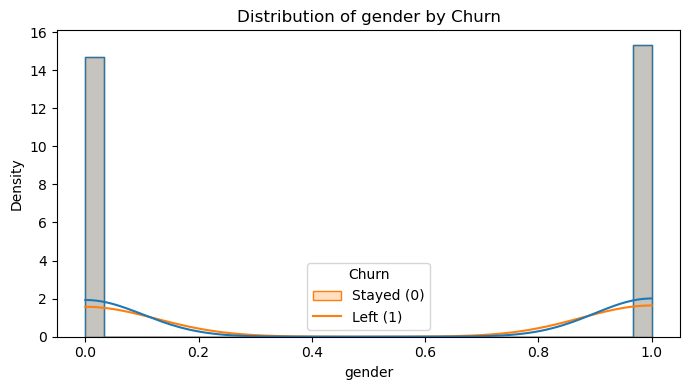

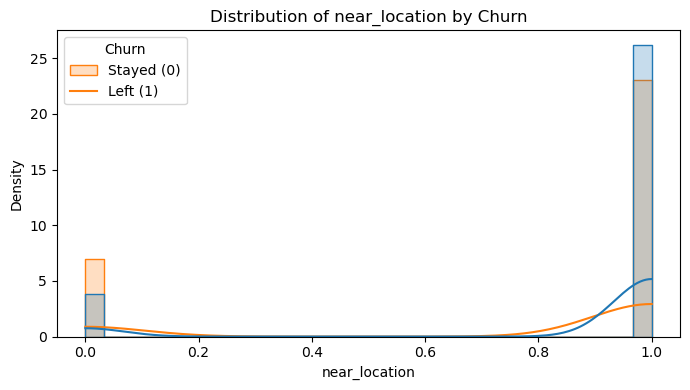

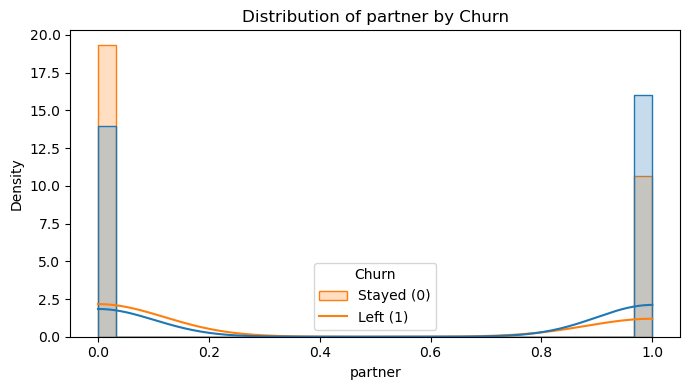

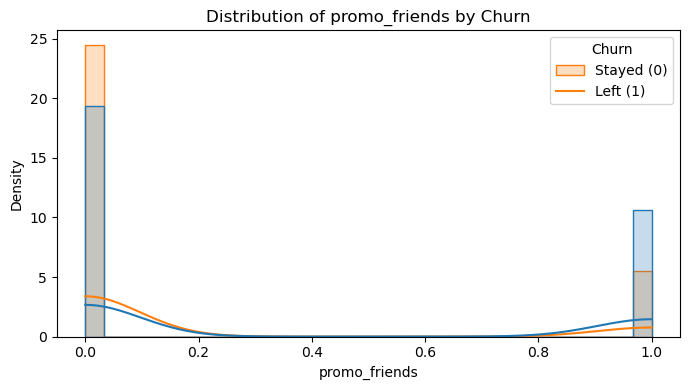

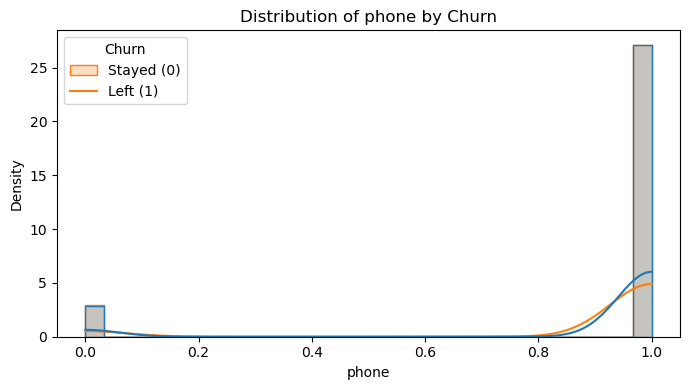

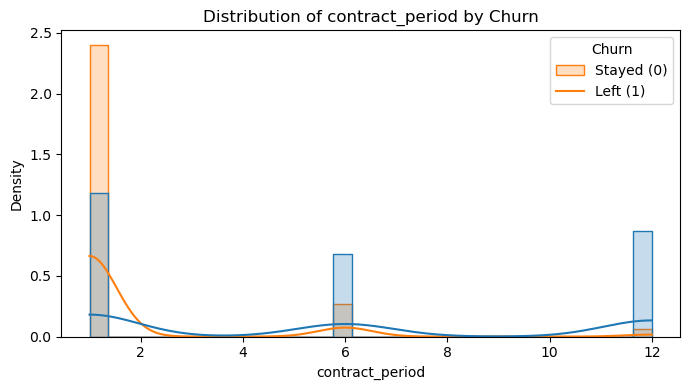

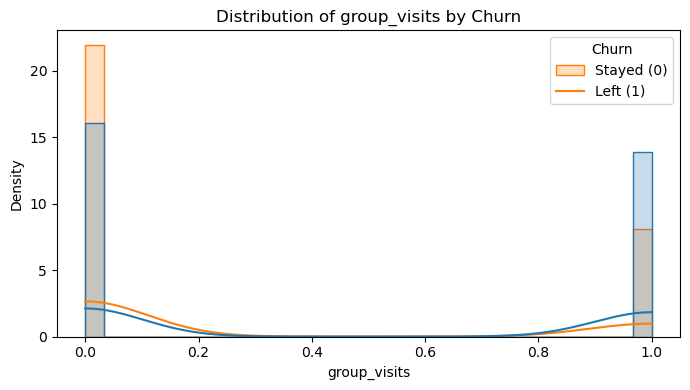

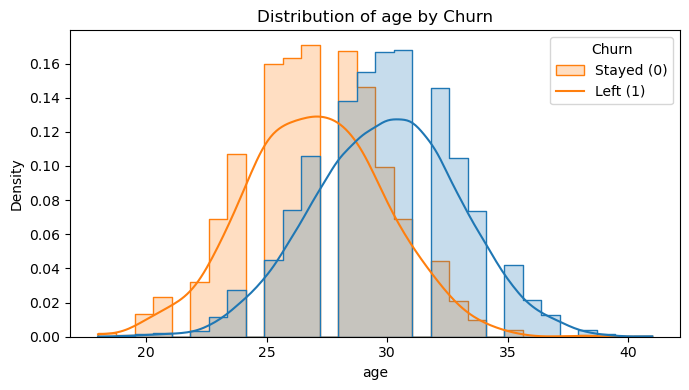

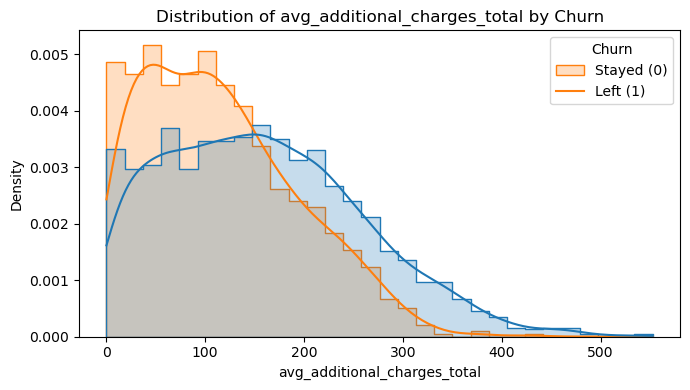

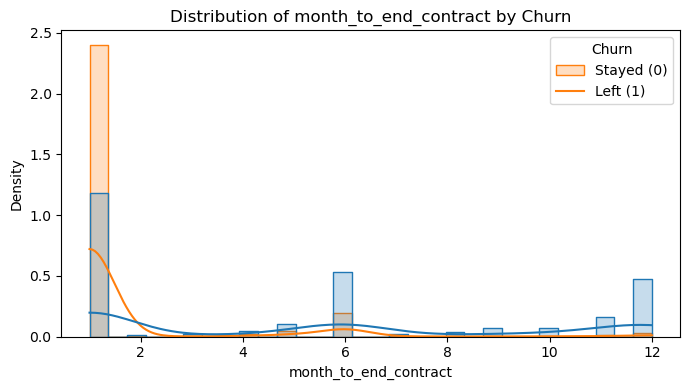

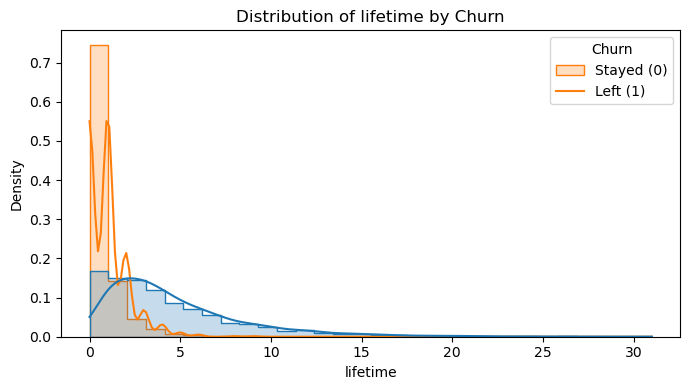

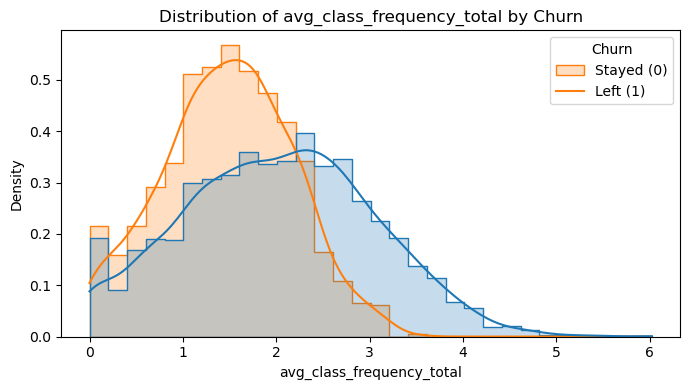

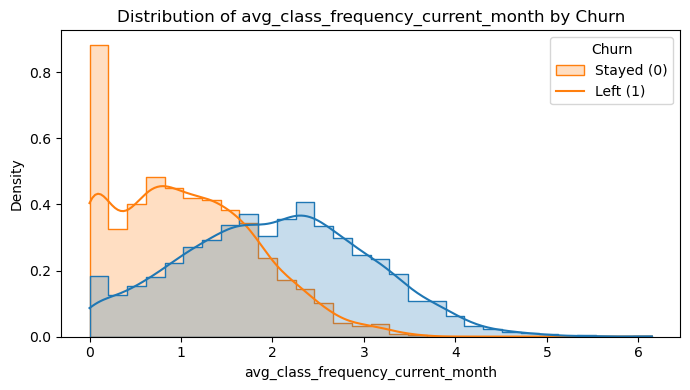

In [28]:
for feature in num_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=fitness, x=feature, hue='churn', kde=True, bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['Stayed (0)', 'Left (1)'])
    plt.tight_layout()
    plt.show()

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the correlation matrix.

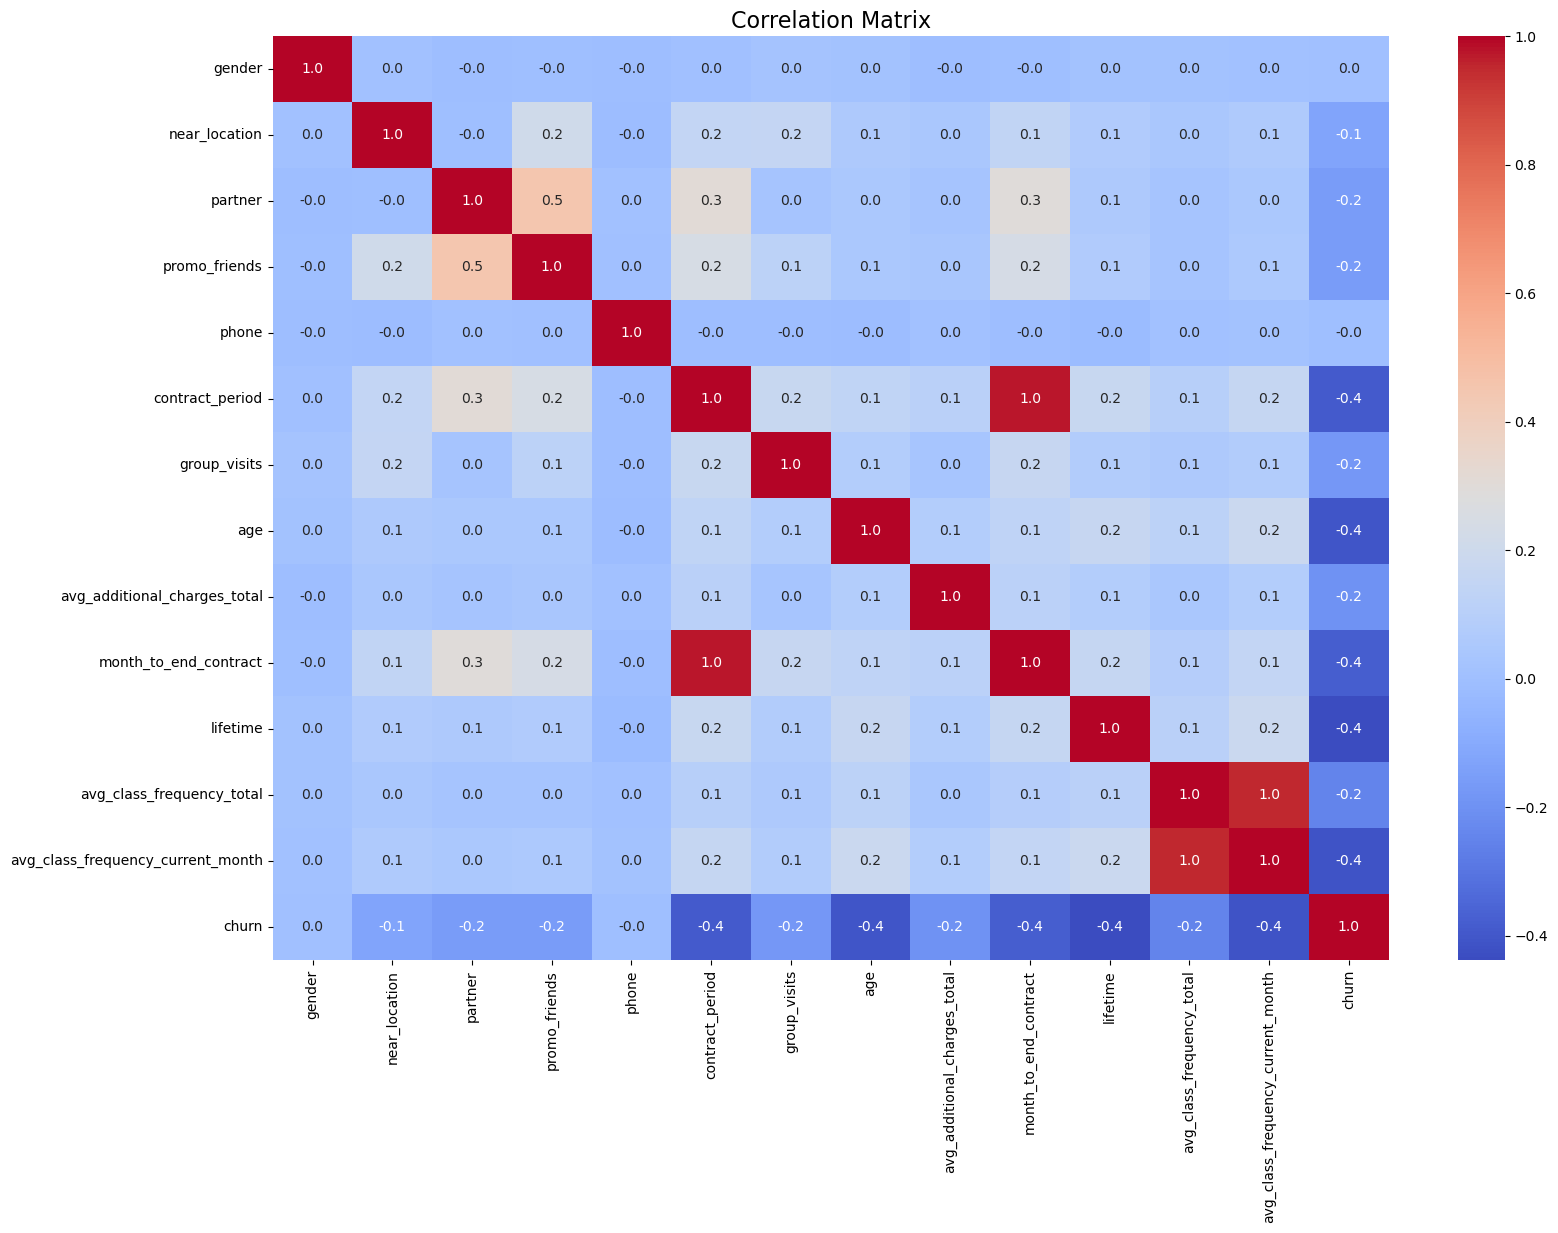

In [30]:
# Ensuring only numeric columns
num_df = fitness.select_dtypes(include=['number'])

# Calculating the correlation matrix
cm = num_df.corr()

# Plotting a heatmap
plt.figure(figsize=(18,12))
sns.heatmap(cm, annot=True, fmt='.1f', cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Building a model to predict customer turnover

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">

Dividing training and validation data into two sets and training the model with two methods:

- Logistics Regression
- Random Forest

In [32]:
# Dividing the data into the matrix (x) and the target variable (y)
X = num_df.drop('churn', axis=1)
y = num_df['churn']

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Training the model
model_rfc = RandomForestClassifier(random_state=0)
model_rfc.fit(X_train, y_train)

# Making predictions
preds = model_rfc.predict(X_test)
probs = model_rfc.predict_proba(X_test)[:, 1]

# Calculating metrics
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, preds)))
print('Precision: {:.2f}'.format(precision_score(y_test, preds)))
print('Sensitivity: {:.2f}'.format(recall_score(y_test, preds)))
print('F1: {:.2f}'.format(f1_score(y_test, preds)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probs)))

Accuracy: 0.92
Precision: 0.84
Sensitivity: 0.82
F1: 0.83
ROC_AUC: 0.97


In [34]:
# Defining the model algorithm
model1 = LogisticRegression(max_iter=1000)

# Training the model
model1.fit(X_train, y_train)

# Making predictions
predictions1 = model1.predict(X_test)
probabilities = model1.predict_proba(X_test)[:,1]

# Calculating metrics
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions1)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions1)))
print('Sensitivity: {:.2f}'.format(recall_score(y_test, predictions1)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions1)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Accuracy: 0.92
Precision: 0.86
Sensitivity: 0.83
F1: 0.84
ROC_AUC: 0.97


<span style = "color: black; font-family: arial; font-size: 20px;">
Although the two models had good and very similar results, the logistic regression model presented a better result than the random forest, especially in accuracy and sensitivity.

## Creating customer groupings

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Standardizing the data.

In [36]:
sc = StandardScaler()
x_sc = sc.fit_transform(num_df)

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Using the Linkage function to build the distance matrix based on the matrix of standardized characteristics.

In [39]:
linked = linkage(x_sc, method = 'ward')

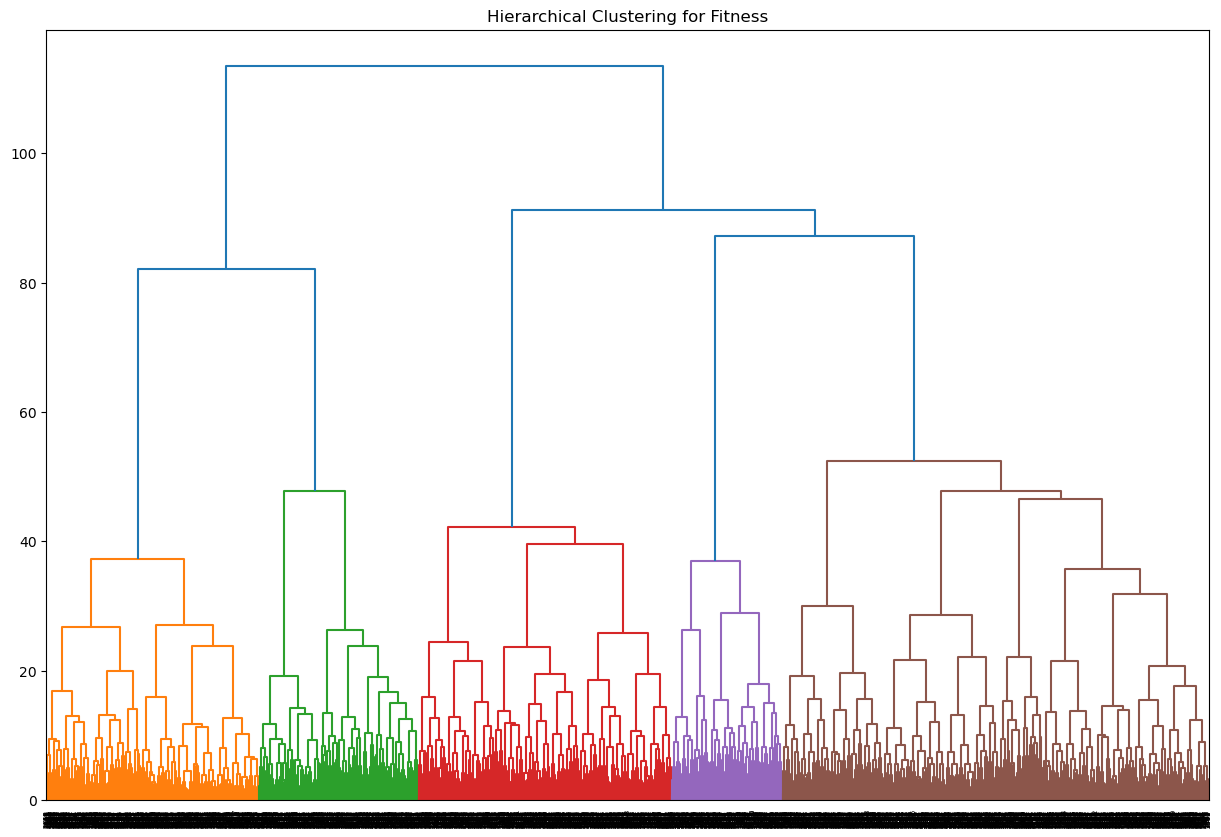

In [40]:
# Plotting a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering for Fitness')
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
It is possible to highlight 5 groupings, which correspond to the five different colors of the chart.

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Training the grouping model with the K-Means algorithm and predicting customer clusters.

In [47]:
# Defining k_means model with 5 clusters
km = KMeans(n_clusters=5)
# Predicting clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

<span style = "color: Blue; Font-Family: Arial; Font-Size: 20px;">
Calculating the turnover rate for each group.

In [64]:
num_df['cluster_km'] = labels
num_df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.507609,0.938043,0.736957,0.490217,0.903261,11.973913,0.552174,29.872826,164.884093,10.985870,4.676087,1.986171,1.979197,0.018478
1,0.559459,0.818919,0.262162,0.040541,0.918919,2.843243,0.437838,29.906757,159.223647,2.608108,4.725676,2.945132,2.953620,0.008108
2,0.510224,0.761441,0.339825,0.171373,0.903603,1.546251,0.259981,26.922103,113.998107,1.495618,0.973710,1.447994,1.016963,0.997079
3,0.467550,0.792053,0.341722,0.025166,0.899338,2.664901,0.365563,30.123179,155.257390,2.507285,4.667550,1.215983,1.215333,0.001325
4,0.507168,0.953405,0.838710,1.000000,0.888889,3.593190,0.491039,29.983871,150.467137,3.270609,4.616487,1.978936,1.970735,0.023297


<span style = "color: black; font-family: arial; font-size: 20px;">
In Group 2, which had the highest exit rate of customers, it can be seen that additional spending on the gym were the lowest, with shorter contracts compared to other groupings. Despite representing the group with the lowest age range, it also had a small rate of customers' participation in group sessions, which greatly explains the lack of engagement for this group.


Grouping 0, 1, 3 and 4 were the ones who spent the most additionally at the gym and those who visit it during the week. Despite having the largest age group, they are also the ones who go to the gym the most since they started. In addition, groupings 0, 1, 3 and 4 are the ones that most enjoy group sessions, which explains the good engagement of these groups.

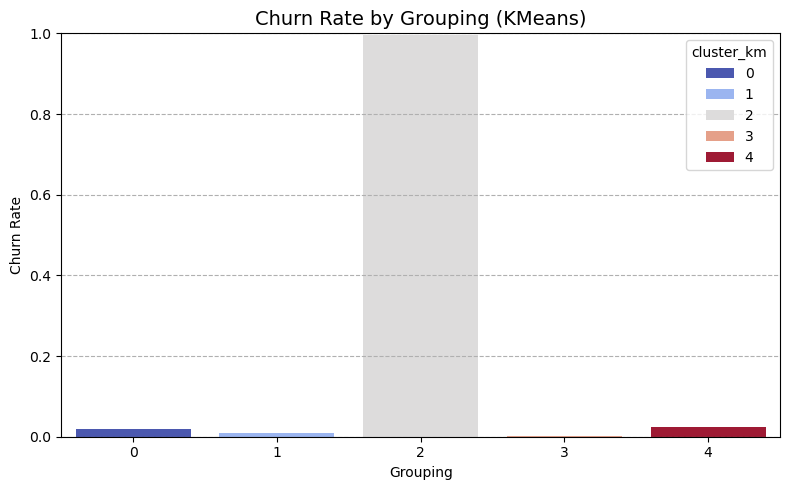

In [67]:
# Calculating churning rate by group
churn_rates = num_df.groupby('cluster_km')['churn'].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_rates, x='cluster_km', y='churn', hue='cluster_km', palette='coolwarm')
plt.title('Churn Rate by Grouping (KMeans)', fontsize=14)
plt.xlabel('Grouping')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

<span style = "color: black; font-family: arial; font-size: 20px;">
The chart shows that groups 0, 1, 3 and 4 (especially 3) had more loyal customers to the gym. However, group 2 almost had a 100% rate of customers who left the gym, showing that this group is more likely to leave.

# Conclusions and recommendations

<span style = "color: black; font-family: arial; font-size: 20px;">


Analysis of customer turnover and customer behavior models revealed that although both logistics and random forest regression had good results, logistics regression stood out in accuracy and sensitivity, making it more reliable to identify proper clients to leave.

Customers were segmented in five distinct groupings:

**Grouping 2**: presented the highest churn rate, characterized by low additional expenses, short contracts and low participation in group sessions, despite being the group with the lowest age group.This indicates low engagement and high risk of turnover.

**Grouping 0, 1, 3 and 4**: Most engaged customers, with higher additional expenses, high frequency and active participation in group sessions.These groups show greater loyalty, especially grouping 0.

Marketing recommendations:

1- Focus on retention of **Grouping 3**: Develop personalized promotions, as well as direct communication programs, encouraging a greater engagement in group classes and a greater use of additional services.

2- Reinforce loyalty programs for loyal groups **0, 1, 3 and 4**: reward frequency and participation, maintaining high engagement and strengthening the relationship with the academy.

3- Strategies Personalization: Adjusting messages, promotions, and engagement programs according to the profile of each group, maximizing the retention and customer's Lifetime Value.